<a href="https://www.kaggle.com/code/trevorglenn/precious-metals-analysis?scriptVersionId=183190976" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/gold_prices.csv
/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/platinum_prices.csv
/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/silver_prices.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
gold = pd.read_csv("/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/gold_prices.csv")
plat = pd.read_csv("/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/platinum_prices.csv")
silver = pd.read_csv("/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/silver_prices.csv")

# Gold EDA

In [4]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1177 non-null   object 
 1   gold_oz_usd_price  1174 non-null   float64
 2   gold_kg_usd_price  1174 non-null   float64
 3   gold_oz_gbp_price  1174 non-null   float64
 4   gold_kg_gbp_price  1174 non-null   float64
 5   gold_oz_eur_price  539 non-null    float64
 6   gold_kg_eur_price  539 non-null    float64
dtypes: float64(6), object(1)
memory usage: 64.5+ KB


In [5]:
gold.describe()

,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
count,1174.000000,1174.000000,1174.000000,1174.000000,539.000000,539.000000
mean,654.229974,21033.951525,438.096831,14085.119702,919.017570,29547.058237
std,571.635717,18378.488530,437.904959,14078.950848,507.674628,16322.094848
min,34.750000,1117.240000,14.480000,465.540000,236.710000,7610.390000
25%,287.787500,9252.572500,181.972500,5850.542500,355.170000,11418.965000
50%,389.400000,12519.480000,240.310000,7726.135000,979.340000,31486.470000
75%,1165.775000,37480.485000,743.282500,23897.050000,1245.735000,40051.255000
max,2452.660000,78854.740000,1955.750000,62878.730000,2288.710000,73583.630000


In [6]:
gold.head()

,Date,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
0,1968-01-02 09:00:00+00:00,35.18,1131.06,14.64,470.69,NaN,NaN
1,1968-01-30 09:00:00+00:00,35.19,1131.38,14.59,469.08,NaN,NaN
2,1968-02-01 09:00:00+00:00,35.20,1131.70,14.59,469.08,NaN,NaN
3,1968-03-01 09:00:00+00:00,35.20,1131.70,14.66,471.33,NaN,NaN
4,1968-04-01 09:00:00+00:00,38.00,1221.73,15.81,508.30,NaN,NaN


Converting date to datetime

In [7]:
import datetime

gold["Date"] = pd.to_datetime(gold["Date"])

Now lets do some EDA on our price variables

In [8]:
ounce_prices = ["gold_oz_usd_price", "gold_oz_gbp_price", "gold_oz_eur_price"]
kg_price = ["gold_kg_usd_price", "gold_kg_gbp_price", "gold_kg_eur_price"]

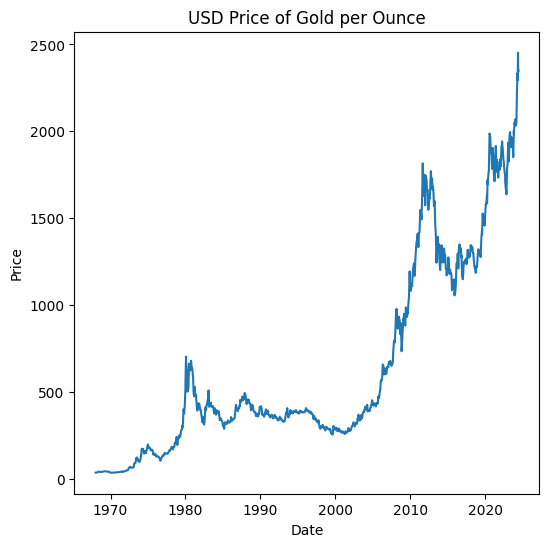

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.lineplot(data=gold, x='Date', y='gold_oz_usd_price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("USD Price of Gold per Ounce")
plt.show()

In [10]:
def plot_ozprice(df, ounce_prices):
    for column in ounce_prices:
        plt.figure(figsize=(6, 6))
        sns.lineplot(data=df, x='Date', y=column, label=column)
        plt.xlabel("Date")
        plt.ylabel(f"Price ({column})")
        plt.title("Price of Gold per Ounce")
        plt.legend()
        plt.show()

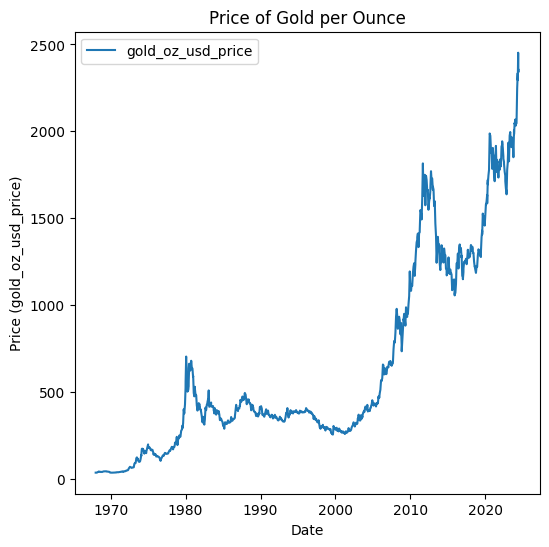

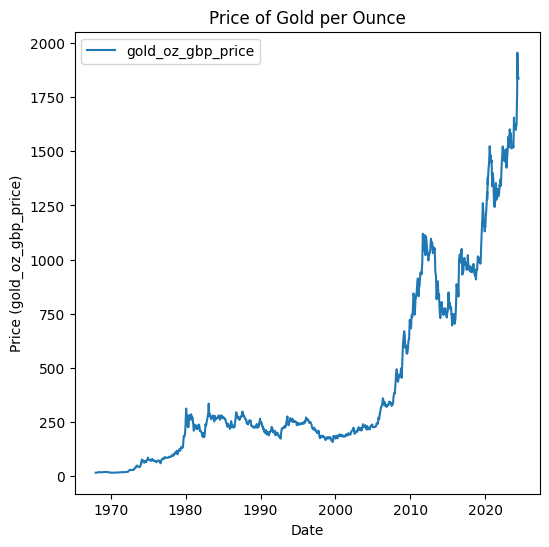

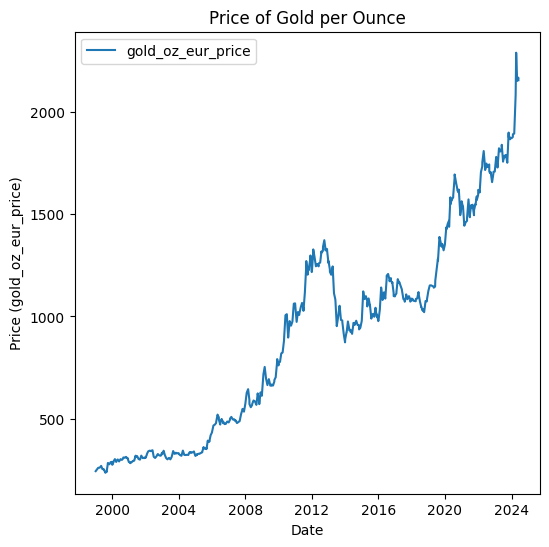

In [11]:
plot_ozprice(gold, ounce_prices=ounce_prices)

In [12]:
def plot_ounceprice(df, ounce_prices, name):
    plt.figure(figsize=(10, 6))
    for column in ounce_prices:
        sns.lineplot(data=df, x='Date', y=column, label=column)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"Price of {name} per Ounce")
    plt.legend()
    plt.tight_layout()
    plt.show()

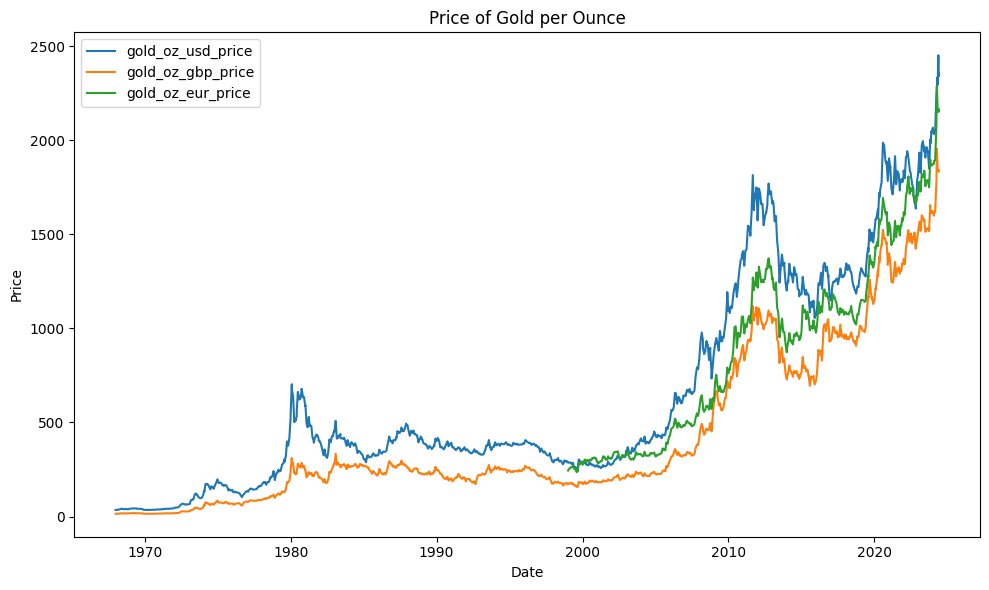

In [13]:
plot_ounceprice(gold, ounce_prices, "Gold")

Need to convert prices to current spot exchange values to get better idea of differences between markets.

In [14]:
gbp_to_usd = 1.28
eur_to_usd = 1.09

gold['gold_oz_gbp_price_converted'] = gold["gold_oz_gbp_price"] * gbp_to_usd
gold['gold_oz_eur_price_converted'] = gold["gold_oz_eur_price"] * eur_to_usd

gold_usd_ozonly = pd.DataFrame(data=gold, columns=['Date', 'gold_oz_usd_price', 'gold_oz_gbp_price_converted', 'gold_oz_eur_price_converted'])
new_ounce_prices = ['gold_oz_usd_price', 'gold_oz_gbp_price_converted', 'gold_oz_eur_price_converted']


def plot_ozconvertedprice(df, new_ounce_prices, name):
    plt.figure(figsize=(10, 6))
    for column in new_ounce_prices:
        sns.lineplot(data=df, x='Date', y=column, label=column)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"USD Price of {name} per Ounce (converted to USD)")
    plt.legend()
    plt.show()

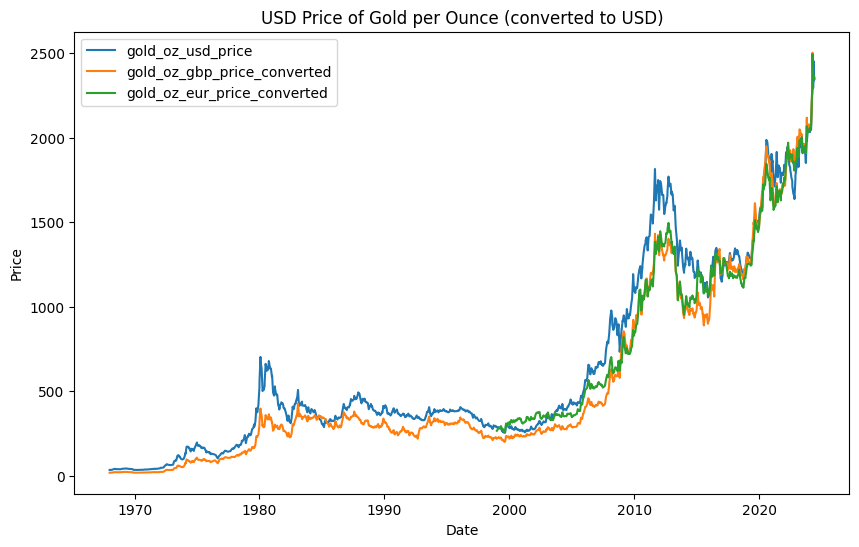

In [15]:
plot_ozconvertedprice(gold_usd_ozonly, new_ounce_prices, "Gold")

We can see a sizeable difference in key areas for each currency market. There is a clear difference in the early 1980s between the British Pound and USD, and another in the early to mid 2010s between all three currencies. While we are only using the spot price and not the full index of exchange rates over the time period we can still see a clear difference between all three currencies on the gold (oz) market. 

In [16]:
def plot_kgprice(df, kg_prices, name):
    plt.figure(figsize=(10, 6))
    for column in kg_prices:
        sns.lineplot(data=df, x='Date', y=column, label=column)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"Price of {name} per KG")
    plt.legend()
    plt.show()

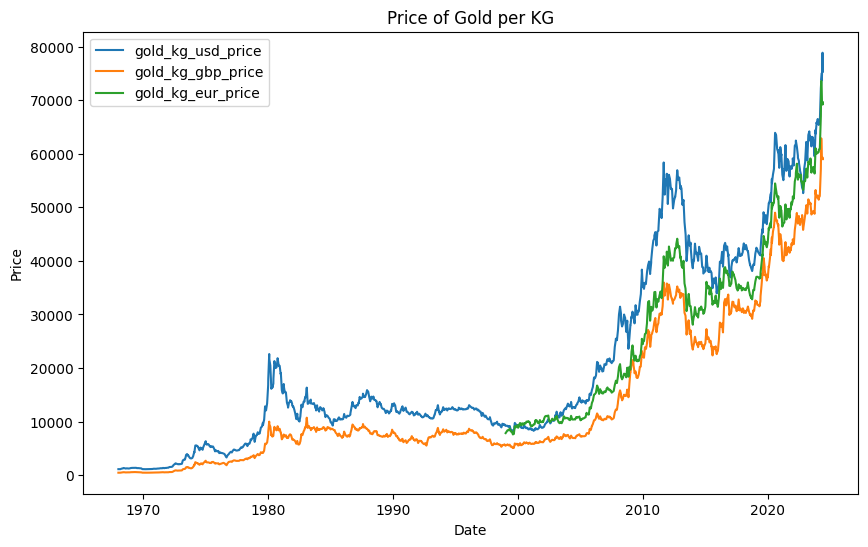

In [17]:
plot_kgprice(gold, kg_price, "Gold")

In [18]:
gold['gold_kg_gbp_price_converted'] = gold["gold_kg_gbp_price"] * gbp_to_usd
gold['gold_kg_eur_price_converted'] = gold["gold_kg_eur_price"] * eur_to_usd

gold_usd_kgonly = pd.DataFrame(data=gold, columns=['Date', 'gold_kg_usd_price', 'gold_kg_gbp_price_converted', 'gold_kg_eur_price_converted'])
new_kg_prices = ['gold_kg_usd_price', 'gold_kg_gbp_price_converted', 'gold_kg_eur_price_converted']


def plot_kgconvertedprice(df, new_kg_prices, name):
    plt.figure(figsize=(10, 6))
    for column in new_kg_prices:
        sns.lineplot(data=df, x='Date', y=column, label=column)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"USD Price of {name} per KG converted to USD")
    plt.legend()
    plt.show()

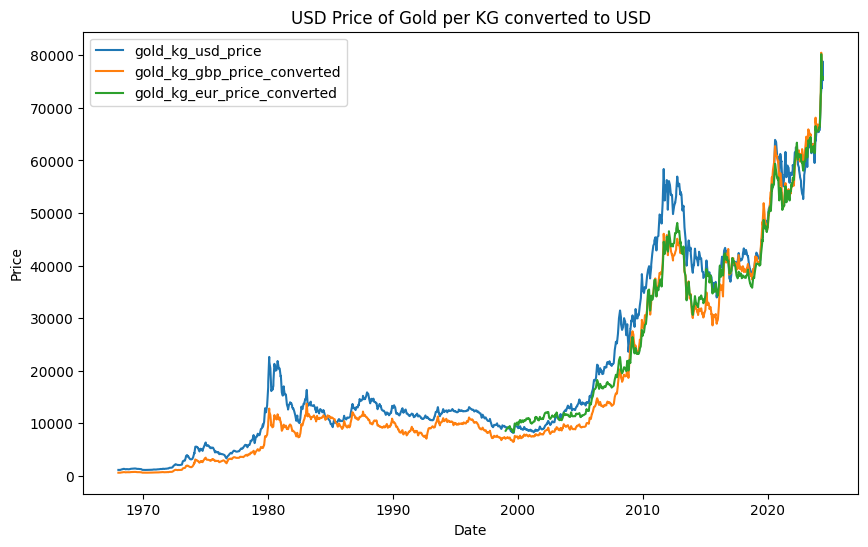

In [19]:
plot_kgconvertedprice(gold_usd_kgonly, new_kg_prices, "Gold")

Since about 2009 British Pound and Euro gold (kg) markets are close to identical except for a few divergences. Also, something that was extremely likely - it closely matches our gold (oz) markets lineplot which makes sense since this is just a change in quantity. It's important to note that the USD market always seem to be higher in price than the GBP and Euro markets. The lineplots follow each other closely but only since around 2015 have they matched almost entirely - this could be due to our spot exchange rate being more similar to the 2015 spot rate. We'll need to check that later after we continue exploring our variables. Up next is checking distributions.  

<Axes: xlabel='gold_oz_usd_price', ylabel='Count'>

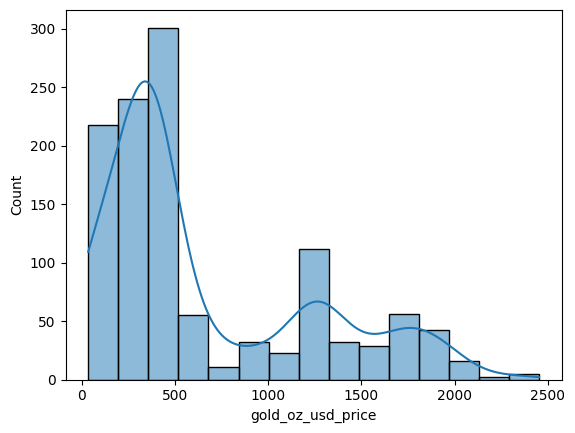

In [20]:
sns.histplot(gold['gold_oz_usd_price'], kde=True)

<Axes: xlabel='gold_oz_gbp_price_converted', ylabel='Count'>

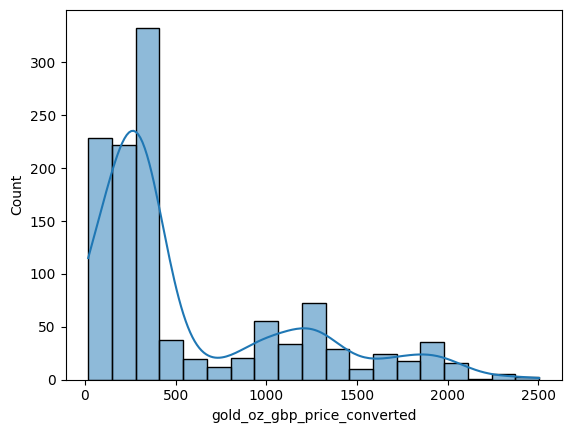

In [21]:
sns.histplot(gold['gold_oz_gbp_price_converted'], kde=True)

<Axes: xlabel='gold_oz_eur_price_converted', ylabel='Count'>

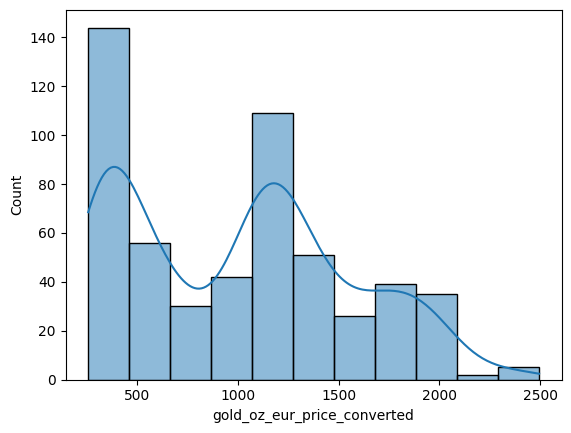

In [22]:
sns.histplot(gold['gold_oz_eur_price_converted'], kde=True)

From our distributions we can see that when converted, GBP has the highest count of low prices which follows our lineplots insights. Euro is a tougher market to compare due to it being much younger than the other two currencies, however when looking at Euro and USD we see less-skewed distributions than GBP - Euro being the most normal distribution of the three and close to bimodal. 

In [23]:
gold.describe()

,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price,gold_oz_gbp_price_converted,gold_oz_eur_price_converted,gold_kg_gbp_price_converted,gold_kg_eur_price_converted
count,1174.000000,1174.000000,1174.000000,1174.000000,539.000000,539.000000,1174.000000,539.000000,1174.000000,539.000000
mean,654.229974,21033.951525,438.096831,14085.119702,919.017570,29547.058237,560.763944,1001.729151,18028.953218,32206.293479
std,571.635717,18378.488530,437.904959,14078.950848,507.674628,16322.094848,560.518347,553.365345,18021.057086,17791.083385
min,34.750000,1117.240000,14.480000,465.540000,236.710000,7610.390000,18.534400,258.013900,595.891200,8295.325100
25%,287.787500,9252.572500,181.972500,5850.542500,355.170000,11418.965000,232.924800,387.135300,7488.694400,12446.671850
50%,389.400000,12519.480000,240.310000,7726.135000,979.340000,31486.470000,307.596800,1067.480600,9889.452800,34320.252300
75%,1165.775000,37480.485000,743.282500,23897.050000,1245.735000,40051.255000,951.401600,1357.851150,30588.224000,43655.867950
max,2452.660000,78854.740000,1955.750000,62878.730000,2288.710000,73583.630000,2503.360000,2494.693900,80484.774400,80206.156700


In [96]:
gold_converted['Date'].min()

Timestamp('1968-01-02 09:00:00+0000', tz='UTC')

In [24]:
gold_converted = gold.drop(columns=['gold_oz_gbp_price', 'gold_kg_gbp_price', 'gold_oz_eur_price', 'gold_kg_eur_price'])

In [25]:
gold_converted.describe()

,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price_converted,gold_oz_eur_price_converted,gold_kg_gbp_price_converted,gold_kg_eur_price_converted
count,1174.000000,1174.000000,1174.000000,539.000000,1174.000000,539.000000
mean,654.229974,21033.951525,560.763944,1001.729151,18028.953218,32206.293479
std,571.635717,18378.488530,560.518347,553.365345,18021.057086,17791.083385
min,34.750000,1117.240000,18.534400,258.013900,595.891200,8295.325100
25%,287.787500,9252.572500,232.924800,387.135300,7488.694400,12446.671850
50%,389.400000,12519.480000,307.596800,1067.480600,9889.452800,34320.252300
75%,1165.775000,37480.485000,951.401600,1357.851150,30588.224000,43655.867950
max,2452.660000,78854.740000,2503.360000,2494.693900,80484.774400,80206.156700


In [26]:
correlation_matrix = gold_converted.corr()
print(correlation_matrix)

                                 Date  gold_oz_usd_price  gold_kg_usd_price  \
Date                         1.000000           0.857302           0.857302   
gold_oz_usd_price            0.857302           1.000000           1.000000   
gold_kg_usd_price            0.857302           1.000000           1.000000   
gold_oz_gbp_price_converted  0.843639           0.985593           0.985593   
gold_oz_eur_price_converted  0.950511           0.977758           0.977758   
gold_kg_gbp_price_converted  0.843639           0.985593           0.985593   
gold_kg_eur_price_converted  0.950511           0.977758           0.977758   

                             gold_oz_gbp_price_converted  \
Date                                            0.843639   
gold_oz_usd_price                               0.985593   
gold_kg_usd_price                               0.985593   
gold_oz_gbp_price_converted                     1.000000   
gold_oz_eur_price_converted                     0.995903   
gold_kg

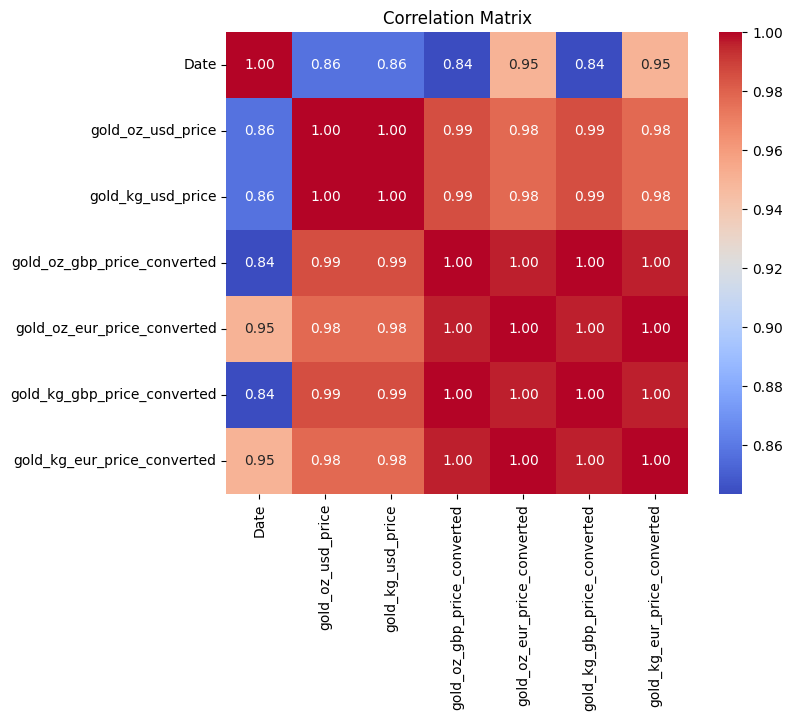

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Silver EDA

In [28]:
silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1178 non-null   object 
 1   silver_oz_usd_price  1174 non-null   float64
 2   silver_kg_usd_price  1174 non-null   float64
 3   silver_oz_gbp_price  1174 non-null   float64
 4   silver_kg_gbp_price  1174 non-null   float64
 5   silver_oz_eur_price  539 non-null    float64
 6   silver_kg_eur_price  539 non-null    float64
dtypes: float64(6), object(1)
memory usage: 64.5+ KB


In [29]:
silver.head()

,Date,silver_oz_usd_price,silver_kg_usd_price,silver_oz_gbp_price,silver_kg_gbp_price,silver_oz_eur_price,silver_kg_eur_price
0,1968-01-02 09:00:00+00:00,2.17,69.77,0.90,28.94,NaN,NaN
1,1968-01-30 09:00:00+00:00,2.02,64.94,0.84,27.01,NaN,NaN
2,1968-02-01 09:00:00+00:00,2.00,64.30,0.83,26.69,NaN,NaN
3,1968-03-01 09:00:00+00:00,2.20,70.73,0.92,29.58,NaN,NaN
4,1968-04-01 09:00:00+00:00,2.26,72.66,0.94,30.22,NaN,NaN


In [30]:
silver.describe()

,silver_oz_usd_price,silver_kg_usd_price,silver_oz_gbp_price,silver_kg_gbp_price,silver_oz_eur_price,silver_kg_eur_price
count,1174.00000,1174.000000,1174.000000,1174.000000,539.000000,539.000000
mean,10.54121,338.907283,6.796985,218.527947,17.004304,546.700334
std,8.40096,270.096933,5.923848,190.455982,84.796043,2726.252168
min,1.27000,40.830000,0.510000,16.400000,3.810000,122.490000
25%,4.68000,150.470000,2.865000,92.110000,5.980000,192.260000
50%,6.25000,200.940000,3.765000,121.050000,13.510000,434.360000
75%,16.27250,523.170000,10.677500,343.290000,19.230000,618.260000
max,49.45000,1589.850000,29.260000,940.730000,1975.910000,63526.890000


In [31]:
silver["Date"] = pd.to_datetime(silver["Date"])

In [32]:
silv_ounce_prices = ["silver_oz_usd_price", "silver_oz_gbp_price", "silver_oz_eur_price"]

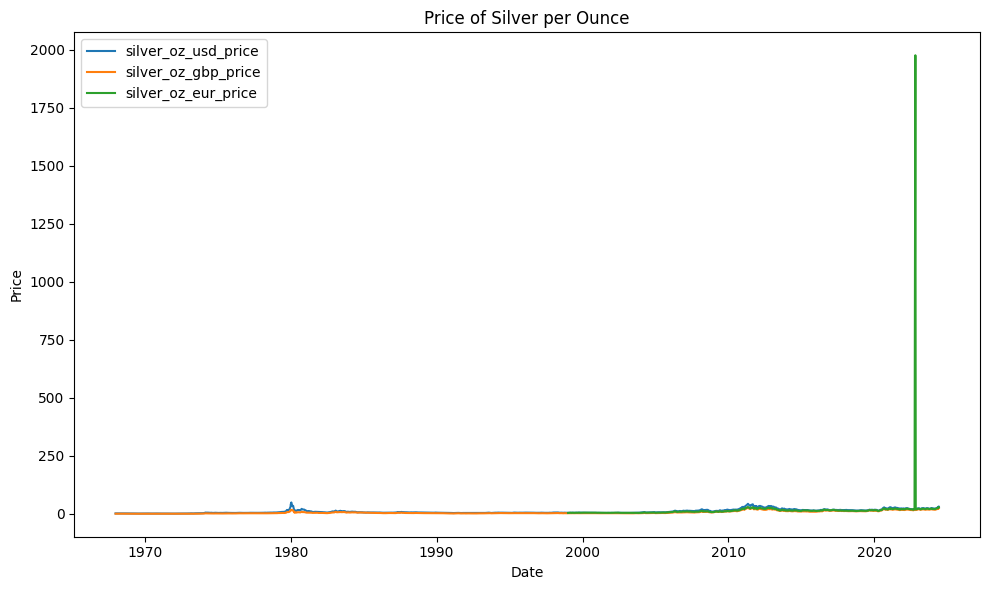

In [33]:
plot_ounceprice(silver, silv_ounce_prices, "Silver")

There is a massive spike in Euro silver ounce prices, we need to scope this and find out why this is.

In [34]:
silver['silver_oz_eur_price'].idxmax()

1138

In [35]:
silver.loc[1138]

Date                   2022-10-22 05:16:00+00:00
silver_oz_usd_price                          NaN
silver_kg_usd_price                          NaN
silver_oz_gbp_price                          NaN
silver_kg_gbp_price                          NaN
silver_oz_eur_price                      1975.91
silver_kg_eur_price                     63526.89
Name: 1138, dtype: object

The rest of our prices were null except for a massive spike in KG price as well, we do have the date so we can check if there is any news on why this spike occured.

From a market data source https://www.bullion-rates.com/silver/EUR/2022-10-history.htm it appears that the silver market should have been closed on 10-22-2022 which is why our other metals market prices are null and shows that this data may not be correct. There is a return to normalcy on the next market day 10-24-2022 where the price has even declined a little from the previous Friday. 10-21 shows a large price increase which may be part of the reason for this change. We should likely drop this index value to prevent the outlier/potentially false data from affecting our report.

In [36]:
silver.drop(1138, inplace=True)

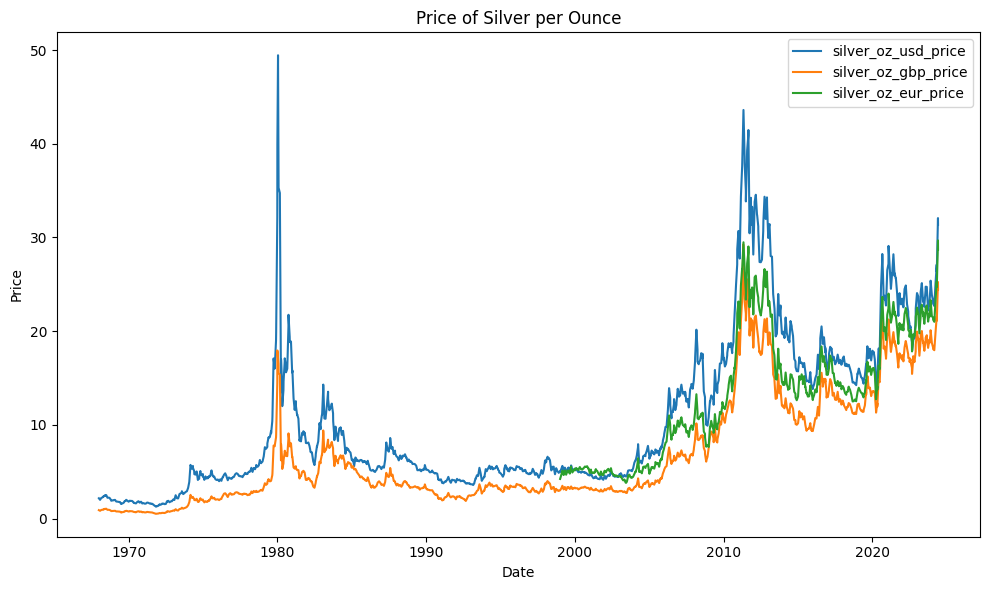

In [37]:
plot_ounceprice(silver, silv_ounce_prices, "Silver")

We see a few spikes in the USD market compared to the GBP market in 1980 and few more later USD spikes occur later near the 2010s that are not always reflecte in our GBP and newly minted Euro markets

Now let's convert all markets to USD using the current spot price so that we can accurately analyze differences in market trends.

In [38]:
silver['silver_oz_gbp_price_converted'] = silver["silver_oz_gbp_price"] * gbp_to_usd
silver['silver_oz_eur_price_converted'] = silver["silver_oz_eur_price"] * eur_to_usd

silver_usd_ozonly = pd.DataFrame(data=silver, columns=['Date', 'silver_oz_usd_price', 'silver_oz_gbp_price_converted', 'silver_oz_eur_price_converted'])
new_silver_ounce_prices = ['silver_oz_usd_price', 'silver_oz_gbp_price_converted', 'silver_oz_eur_price_converted']


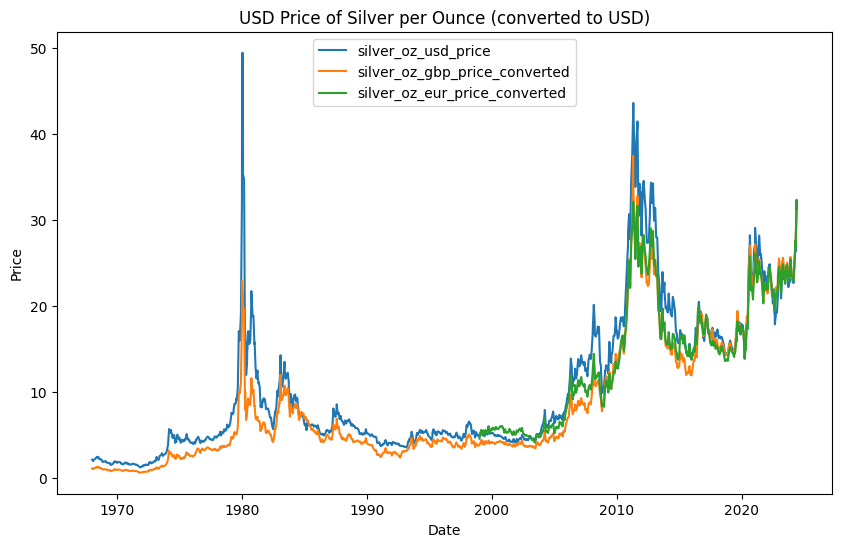

In [39]:
plot_ozconvertedprice(silver_usd_ozonly, new_silver_ounce_prices, "Silver")

We can now see that there are two main spikes in USD markets and a consistently higher price for USD over GBP. Euro market originally splits the difference between the two but then follows GBP quite closely starting around the 2008 financial crisis, and all 3 markets have followed eachother quite closely since around 2015.

Now let's check out kg for the silver markets.

In [42]:
silver['silver_kg_gbp_price_converted'] = silver["silver_kg_gbp_price"] * gbp_to_usd
silver['silver_kg_eur_price_converted'] = silver["silver_kg_eur_price"] * eur_to_usd

silver_usd_kgonly = pd.DataFrame(data=silver, columns=['Date', 'silver_kg_usd_price', 'silver_kg_gbp_price_converted', 'silver_kg_eur_price_converted'])
new_silver_kg_prices = ['silver_kg_usd_price', 'silver_kg_gbp_price_converted', 'silver_kg_eur_price_converted']

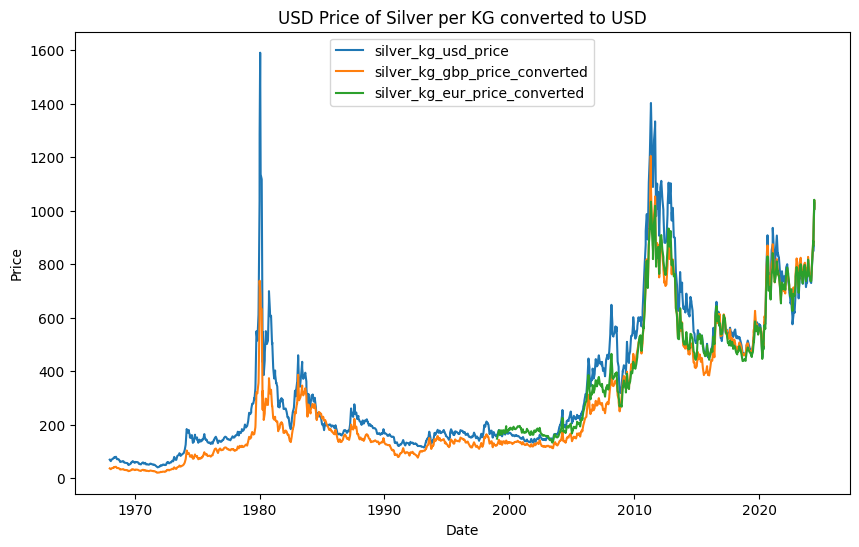

In [43]:
plot_kgconvertedprice(silver_usd_kgonly, new_silver_kg_prices, "Silver")

In [46]:
silver['silver_kg_usd_price'].idxmax()

248

In [47]:
silver.loc[248]

Date                             1980-01-18 09:00:00+00:00
silver_oz_usd_price                                  49.45
silver_kg_usd_price                                1589.85
silver_oz_gbp_price                                    NaN
silver_kg_gbp_price                                    NaN
silver_oz_eur_price                                    NaN
silver_kg_eur_price                                    NaN
silver_oz_gbp_price_converted                          NaN
silver_oz_eur_price_converted                          NaN
silver_kg_gbp_price_converted                          NaN
silver_kg_eur_price_converted                          NaN
Name: 248, dtype: object

Similar to our earlier issue we have a large spike in USD for a date which may not be a trading volume because it is not a standard trading day, we will double check this with a quick google search of the day of the week for 01-18-1980, then we will check the recorded price for that day.

According to https://www.herobullion.com/silvers-highest-price-ever/#:~:text=Silver's%20all%2Dtime%20high%20is,%2Dlong%20all%2Dtime%20high and https://sdbullion.com/silver-prices-1980 this is a correct data point as this date is the highest ever recorded price for Silver Bullion, around 50 USD for an ounce of silver. We will keep this datapoint in our dataset even though the rest of the columns are null. 

<Axes: xlabel='silver_oz_usd_price', ylabel='Count'>

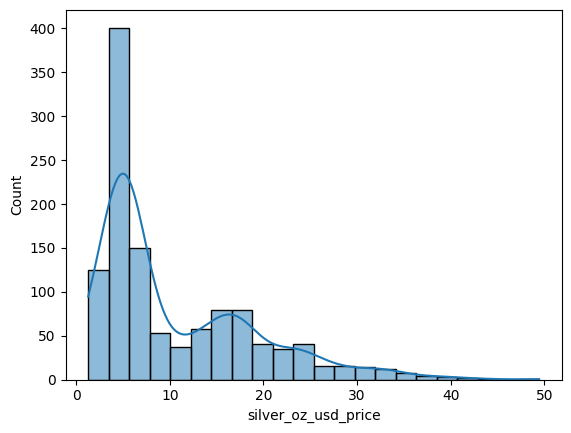

In [58]:
sns.histplot(silver['silver_oz_usd_price'], kde=True)

<Axes: xlabel='silver_oz_gbp_price', ylabel='Count'>

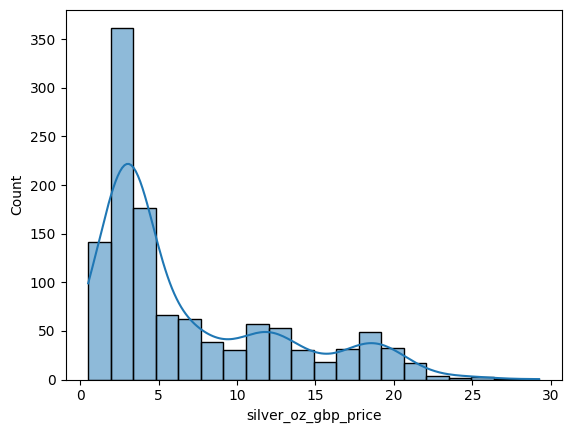

In [59]:
sns.histplot(silver['silver_oz_gbp_price'], kde=True)

<Axes: xlabel='silver_oz_eur_price', ylabel='Count'>

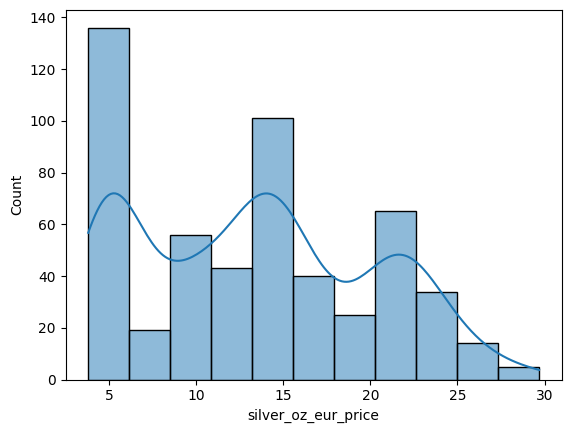

In [60]:
sns.histplot(silver['silver_oz_eur_price'], kde=True)

In [64]:
silver_converted = silver.drop(columns=['silver_oz_gbp_price', 'silver_kg_gbp_price', 'silver_oz_eur_price', 'silver_kg_eur_price'])

In [65]:
silver_correlation_matrix = silver_converted.corr()

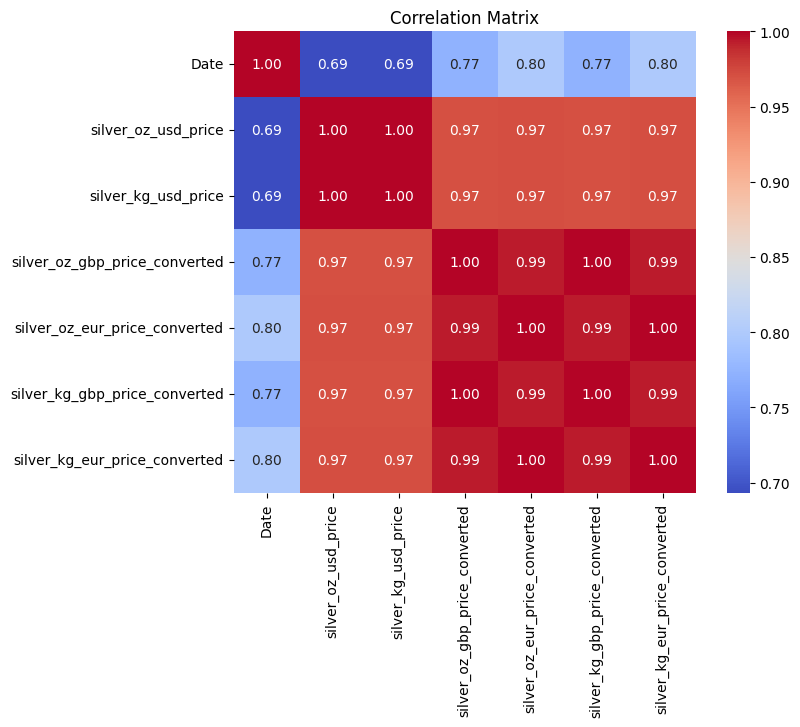

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(silver_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Platinum

In [67]:
plat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   720 non-null    object 
 1   platinum_oz_usd_price  715 non-null    float64
 2   platinum_kg_usd_price  715 non-null    float64
 3   platinum_oz_gbp_price  716 non-null    float64
 4   platinum_kg_gbp_price  716 non-null    float64
 5   platinum_oz_eur_price  537 non-null    float64
 6   platinum_kg_eur_price  537 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


In [68]:
plat.head()

,Date,platinum_oz_usd_price,platinum_kg_usd_price,platinum_oz_gbp_price,platinum_kg_gbp_price,platinum_oz_eur_price,platinum_kg_eur_price
0,1990-04-02 09:00:00+00:00,471.00,15142.98,289.65,9312.45,NaN,NaN
1,1990-04-30 09:00:00+00:00,472.25,15183.17,289.55,9309.24,NaN,NaN
2,1990-05-01 09:00:00+00:00,473.25,15215.32,288.75,9283.51,NaN,NaN
3,1990-05-30 09:00:00+00:00,496.50,15962.82,291.45,9370.32,NaN,NaN
4,1990-06-01 09:00:00+00:00,490.00,15753.84,292.00,9388.00,NaN,NaN


In [69]:
plat.describe()

,platinum_oz_usd_price,platinum_kg_usd_price,platinum_oz_gbp_price,platinum_kg_gbp_price,platinum_oz_eur_price,platinum_kg_eur_price
count,715.000000,715.000000,716.000000,716.000000,537.000000,537.000000
mean,879.954559,28291.155147,571.929749,18387.941760,856.918250,27550.521601
std,431.035686,13858.099121,272.833632,8771.792275,227.711819,7321.094394
min,330.000000,10609.730000,175.400000,5639.230000,300.050000,9646.820000
25%,432.125000,13893.125000,272.150000,8749.815000,696.250000,22384.920000
50%,888.000000,28549.820000,625.265000,20102.705000,860.820000,27675.970000
75%,1136.000000,36523.200000,770.672500,24777.657500,1001.090000,32185.740000
max,2276.000000,73174.990000,1183.000000,38034.280000,1497.300000,48139.240000


In [71]:
plat["Date"] = pd.to_datetime(plat["Date"])

In [74]:
plat_ounce_prices = ["platinum_oz_usd_price", "platinum_oz_gbp_price", "platinum_oz_eur_price"]

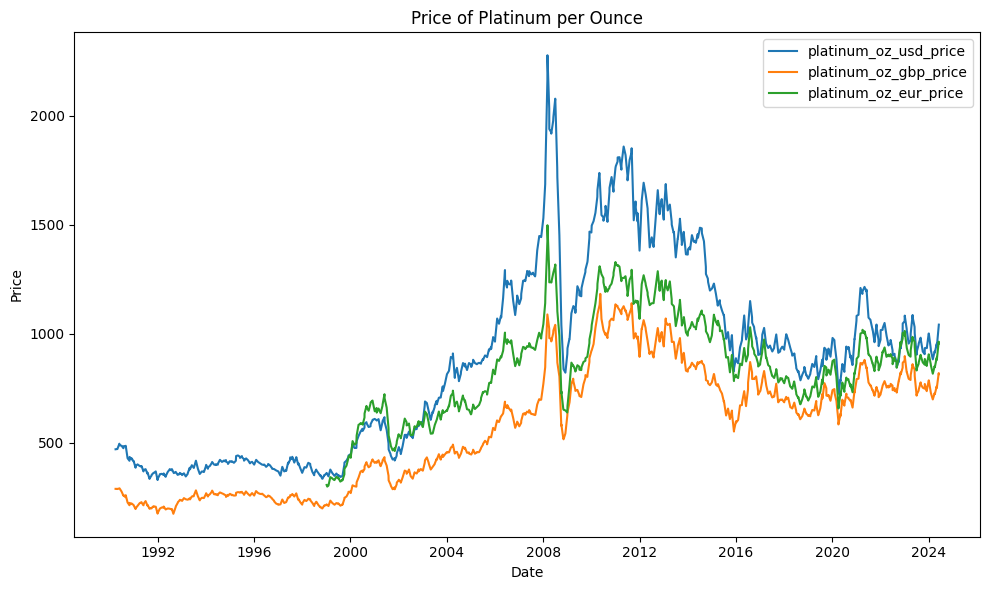

In [75]:
plot_ounceprice(plat, plat_ounce_prices, "Platinum")

In [81]:
plat['platinum_oz_gbp_price_converted'] = plat["platinum_oz_gbp_price"] * gbp_to_usd
plat['platinum_oz_eur_price_converted'] = plat["platinum_oz_eur_price"] * eur_to_usd

plat_usd_ozonly = pd.DataFrame(data=plat, columns=['Date', 'platinum_oz_usd_price', 'platinum_oz_gbp_price_converted', 'platinum_oz_eur_price_converted'])
new_plat_ounce_prices = ['platinum_oz_usd_price', 'platinum_oz_gbp_price_converted', 'platinum_oz_eur_price_converted']


In [86]:
plat_usd_ozonly.head()


,Date,platinum_oz_usd_price,platinum_oz_gbp_price_converted,platinum_oz_eur_price_converted
0,1990-04-02 09:00:00+00:00,471.00,370.752,NaN
1,1990-04-30 09:00:00+00:00,472.25,370.624,NaN
2,1990-05-01 09:00:00+00:00,473.25,369.600,NaN
3,1990-05-30 09:00:00+00:00,496.50,373.056,NaN
4,1990-06-01 09:00:00+00:00,490.00,373.760,NaN


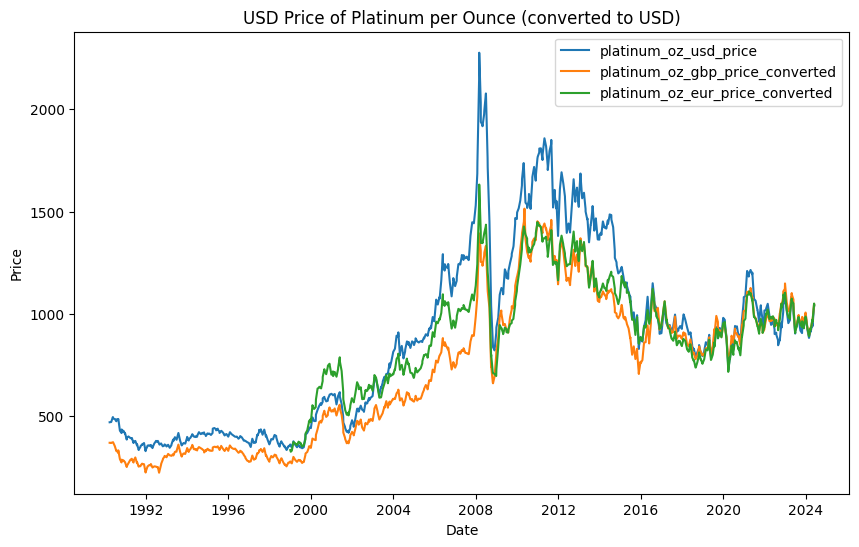

In [83]:
plot_ozconvertedprice(plat_usd_ozonly, new_plat_ounce_prices, "Platinum")

In [87]:
plat['platinum_kg_gbp_price_converted'] = plat["platinum_kg_gbp_price"] * gbp_to_usd
plat['platinum_kg_eur_price_converted'] = plat["platinum_kg_eur_price"] * eur_to_usd

plat_usd_kgonly = pd.DataFrame(data=plat, columns=['Date', 'platinum_kg_usd_price', 'platinum_kg_gbp_price_converted', 'platinum_kg_eur_price_converted'])
new_plat_kg_prices = ['platinum_kg_usd_price', 'platinum_kg_gbp_price_converted', 'platinum_kg_eur_price_converted']

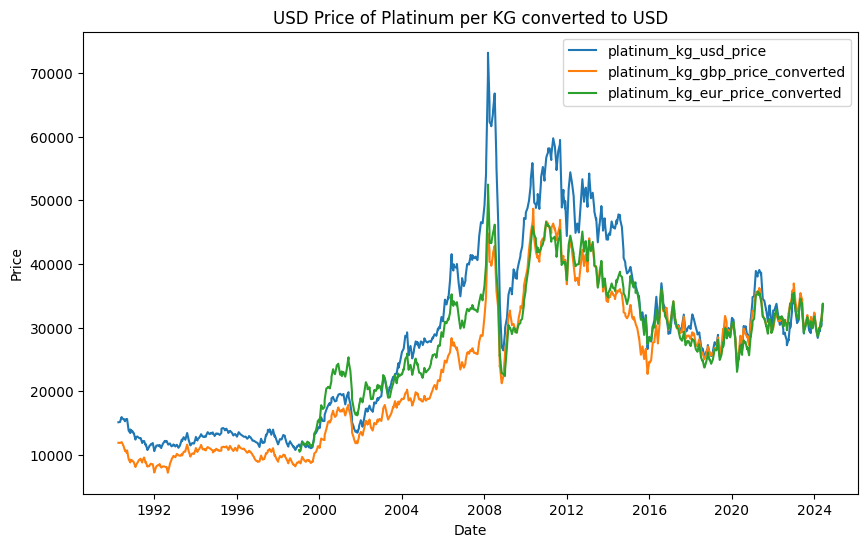

In [88]:
plot_kgconvertedprice(plat_usd_kgonly, new_plat_kg_prices, "Platinum")

<Axes: xlabel='platinum_oz_usd_price', ylabel='Count'>

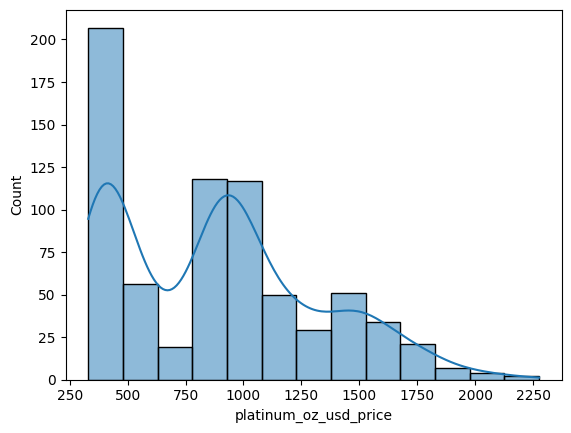

In [89]:
sns.histplot(plat['platinum_oz_usd_price'], kde=True)

<Axes: xlabel='platinum_oz_gbp_price', ylabel='Count'>

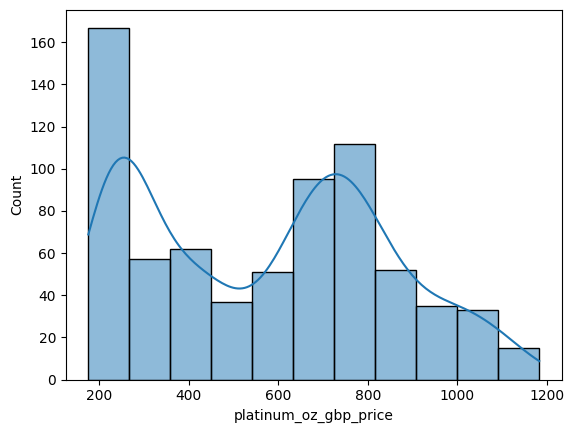

In [90]:
sns.histplot(plat['platinum_oz_gbp_price'], kde=True)

<Axes: xlabel='platinum_oz_eur_price', ylabel='Count'>

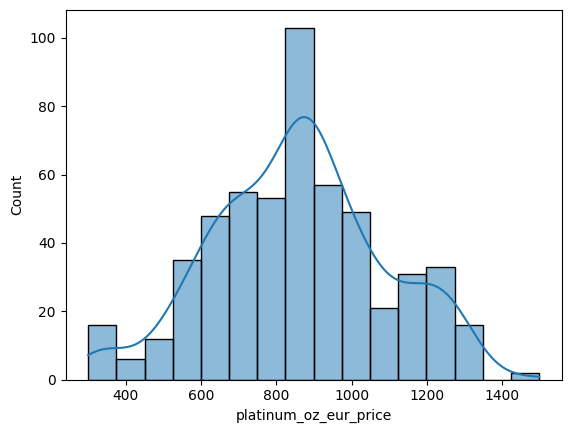

In [91]:
sns.histplot(plat['platinum_oz_eur_price'], kde=True)

In [92]:
plat_converted = plat.drop(columns=['platinum_oz_gbp_price', 'platinum_kg_gbp_price', 'platinum_oz_eur_price', 'platinum_kg_eur_price'])

In [93]:
plat_correlation_matrix = plat_converted.corr()

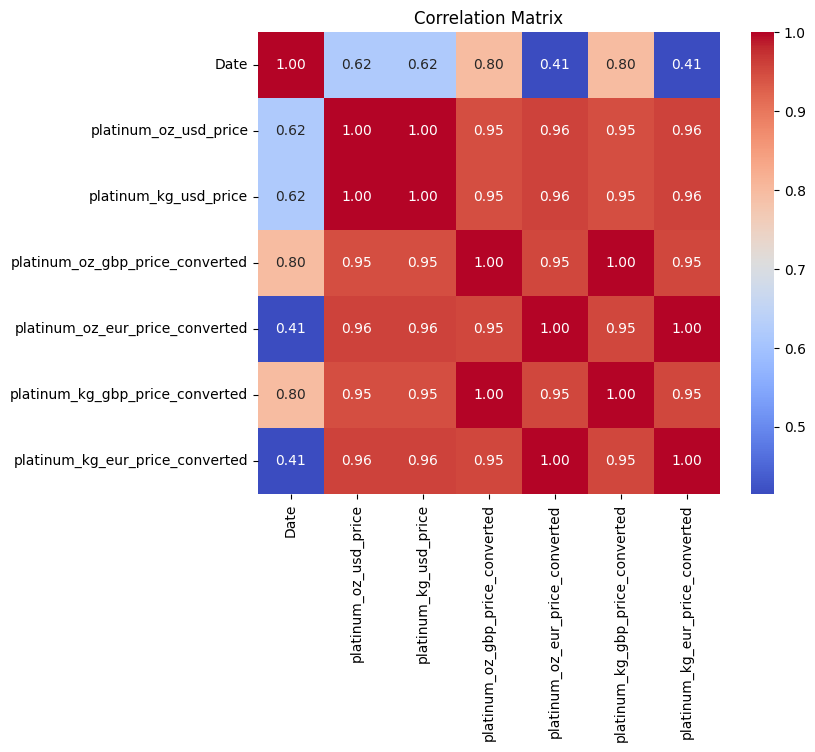

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(plat_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Conclusion

When converted to the current USD spot rate, we can see that there is still a differentiation in each precious metals market where typically the USD market has the highest price, the British Pound is the lowest price, and the Euro market tends to split the difference. We also see that the Euro market tends to have the most normal distribution likely due to its age being relatively much younger than our other two currencies allowing them to only have recent data making prices more normalized. 


We also see that spikes in one market does not neccesarily correspond to spikes in other markets. Our spike in silver prices in 1980 were not necessary equally reflected in extremity to gold and while platinum had a major spike in 2008 we see that gold and silver did not complete a similar spike until later - closer to 2012. This relates that while the precious metals markets are often similar they are still driven by individual supply and demand. However, they **are** more likely correlated to financial market movement as we see spikes in each precious metal, for each market, in 1980 and 2008. This is especially true for the USD market as 1980 was known as "Reagan's Recession": known for a savings, debt, and loan crisis in the US that lead to similar financial crises in other nations, and similarily the 2008 US Housing Crisis lead to a global financial crisis that in-turn lead to major distrust in financial institutions. When currency distrust is prevalent, there is a common consumer belief that precious metals will at least hold value enough to protect against economic downturn and inflation.


Overall we can see that each precious metal typically appreciates over time, with gold having the highest appreciation by far of all three metals (close to 7000% since 1968 - the start of our dataset). We also can see that the best time to buy precious metals is during times of financial stability as the prices are lowest, and the best time to sell is when there is a common distrust in the financial markets or currencies as that is when prices are the highest.

# For Later

If I were to continue this project and want to provide more analysis on the precious metals markets I would likely want to: 


1. Showcase the change in exchange spot rates for our currencies by showcasing it over our market line plots to show how the markets either do or do not move in conjuction with exchange rates 


2. Consider other important market factors such as precious metal markets are affected by their own supply which means that new mines can also have great effect on price due it increasing the supply of precious metals if existing mines are not shut down or slowing in production


3. Detail the different financial crises at-length that seem to be highly correlated with our spikes in market prices, or finding other causes for spikes that may be relevant to our analysis.